<h1>European corporate sales 2023</h1>
Questo progetto analizza un dataset delle vendite da parte di una azienda per identificare 
pattern e trend nelle vendite. I clienti sono stati scelti tra un elenco di aziende europee.
Il dataset è stato generato mediante lo script .py messo a disposizione nella repository che riempie un csv con delle transazioni datate da 1/1/2023 a 31/12/2023.

Le librerie utilizzate sono: numpy, pandas, matplotlib e seaborn.

Il dataset "corporate_purchase.csv" è un insieme di dati che raccoglie informazioni dettagliate sulle transazioni di vendita effettuate da un'azienda con clienti corporativi in tutta Europa. Il dataset comprende 21113 righe, ciascuna rappresentante una singola transazione, e include le seguenti colonne:
<ol>
<li>client: Stringa - Il nome dell'azienda cliente che ha effettuato l'acquisto. </li>
<li>date_of_purchase: Data - La data in cui è stata effettuata la transazione, nel formato YYYY-MM-DD.  </li>
<li>units: Intero - Il numero di unità vendute in ogni transazione.  </li>
<li>price_per_unit: Decimale - Il prezzo per unità venduta, espresso in euro (€).  </li>
<li>payment_method: Stringa - Il metodo di pagamento utilizzato per la transazione. ("credit_card", "cash" e "debit_card") </li>
<li>payment_hour: Stringa - L'orario in cui è stato effettuato il pagamento. </li>
<li>country: Stringa - Il paese europeo in cui ha sede l'azienda cliente. </li>
</ol>

<h3>Import e caricamento del dataset</h3>

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data/corporate_purchase.csv')

<h3>Analisi struttura del dataset</h3>
Osserviamo il tipo di dati e il numero di valori null.
(in questo caso non sono presenti null)
Stampo anche le prime 3 righe per vedere il formato in cui compaiono i dati.

In [20]:
print(data.info())
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21113 entries, 0 to 21112
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client            21113 non-null  object 
 1   date_of_purchase  21113 non-null  object 
 2   units             21113 non-null  int64  
 3   price_per_unit    21113 non-null  float64
 4   payment_method    21113 non-null  object 
 5   payment_hour      21113 non-null  object 
 6   country           21113 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB
None
        client date_of_purchase  units  price_per_unit payment_method  \
0   Mota-Engil       2023-01-02     28           80.23    credit_card   
1         BBVA       2023-03-24     52           62.41           cash   
2  Greene King       2023-01-14     53          241.82    credit_card   

  payment_hour                 country  
0        11:29                 Ukraine  
1        08:35  Bosnia and 

<h3>Considerazioni e quesiti</h3>
<ol> <li><strong>Qual è il totale delle vendite e il ricavo medio per transazione?</strong></li> <li><strong>Quali clienti generano il maggior volume di vendite?</strong></li> <li><strong>Quali paesi contribuiscono maggiormente alle vendite totali?</strong></li> <li><strong>Quali sono le tendenze di vendita nel tempo?</strong></li> <li><strong>Esistono tendenze stagionali nelle vendite?</strong></li> <li><strong>Quali clienti hanno il valore medio di acquisto più alto?</strong></li> <li><strong>C'è una relazione tra il numero di unità acquistate e il prezzo per unità?</strong></li> </ol>


In [21]:
#Quesito 1 ---> Qual è il totale delle vendite e il ricavo medio per transazione?

# Calcolo del ricavo per ogni transazione
data['total_revenue'] = data['units'] * data['price_per_unit']

# Totale delle vendite
total_sales = data['total_revenue'].sum()
print(f"Totale delle Vendite: €{total_sales}")

# Ricavo medio per transazione
average_revenue = data['total_revenue'].mean()
print(f"Ricavo Medio per Transazione: €{average_revenue}")



Totale delle Vendite: €165251427.76999998
Ricavo Medio per Transazione: €7826.998899730023


In [22]:
#Quesito 2 ---> Quali clienti generano il maggior volume di vendite?

# Calcolo del numero di vendite per cliente
sales_per_client = data.groupby('client')['total_revenue'].sum().sort_values(ascending=False)

# Visualizzazione dei primi 10 clienti
top_clients = sales_per_client.head(10)
print("Top 10 Clienti per Volume di Vendite:")
print(top_clients)

Top 10 Clienti per Volume di Vendite:
client
Aviva                 1518642.47
Nestlé                1176792.80
CRH plc               1164021.68
Kingspan Group        1049237.25
Sika AG               1037758.03
Swatch Group          1008156.40
ABB                    924566.93
Legal & General        863222.85
Melrose Industries     848578.66
Ferrovial              846668.33
Name: total_revenue, dtype: float64


In [23]:
#Quesito 3 ---> Quali paesi contribuiscono maggiormente alle vendite totali?

# Calcolo del ricavo totale per paese
sales_per_country = data.groupby('country')['total_revenue'].sum().sort_values(ascending=False)

# Visualizzazione dei primi 10 paesi
top_10_countries = sales_per_country.head(10)
print("Top 10 Paesi per Vendite Totali:")
print(top_10_countries)

Top 10 Paesi per Vendite Totali:
country
Netherlands        4171425.64
Serbia             4099372.53
Greece             4025650.52
Romania            4008690.78
North Macedonia    3973608.27
United Kingdom     3906593.45
Poland             3899860.28
Czech Republic     3896115.76
San Marino         3891690.59
Estonia            3861776.17
Name: total_revenue, dtype: float64


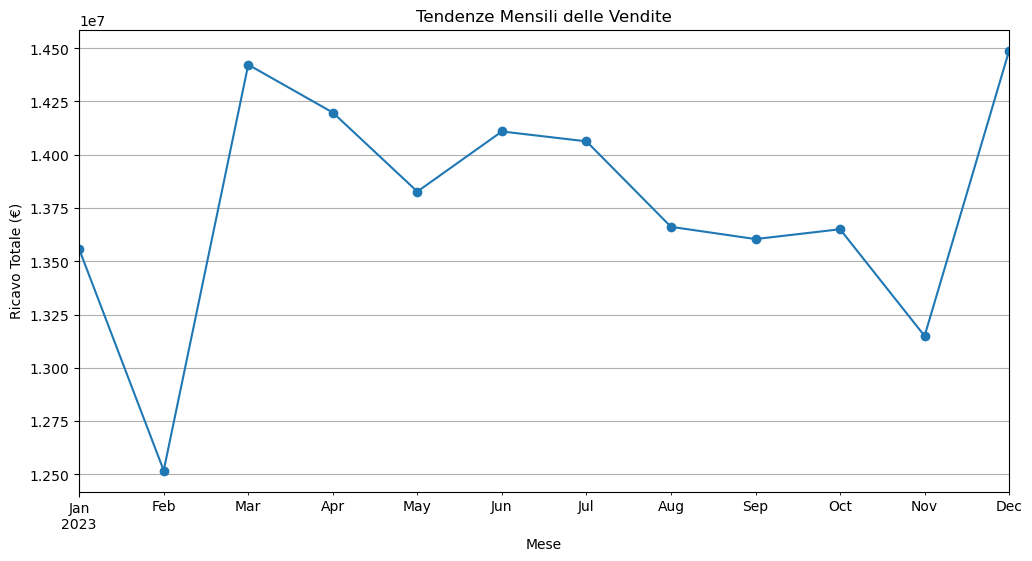

In [24]:
#Quesito 4 ---> Quali sono le tendenze di vendita nel tempo?

# Conversione della colonna 'date_of_purchase' in formato datetime
data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'])

# Calcolo delle vendite mensili
monthly_sales = data.set_index('date_of_purchase').resample('ME')['total_revenue'].sum()

# Visualizzazione del trend delle vendite nel tempo
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Tendenze Mensili delle Vendite')
plt.xlabel('Mese')
plt.ylabel('Ricavo Totale (€)')
plt.grid(True)
plt.show()